<a href="https://colab.research.google.com/github/juniomuniz/An-lise-comparativa-das-varia-es-no-pre-o-da-cesta-b-sica/blob/main/Alucar1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alucar - Analisando as Vendas


In [ ]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

In [ ]:
alucar = pd.read_csv('alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [ ]:
print('Quantidade de linhas e Colunas:', alucar.shape)

Quantidade de linhas e Colunas: (24, 2)


In [ ]:
print('quantidade de dados nulos :', alucar.isna().sum().sum())

quantidade de dados nulos : 0


In [ ]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

Converter INT para TIME

In [ ]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

install seaborn

In [ ]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 12.0 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


<Axes: xlabel='mes', ylabel='vendas'>

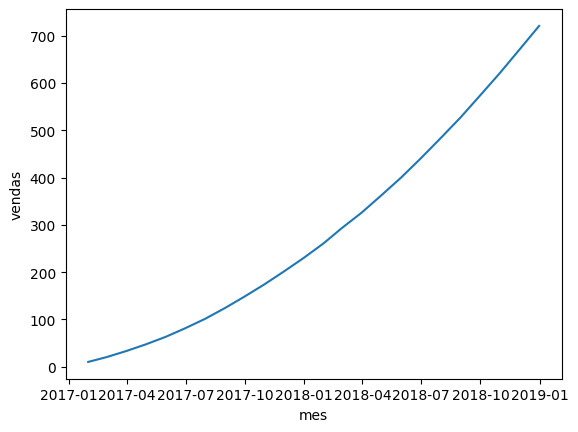

In [ ]:
sns.lineplot(x = 'mes',y = 'vendas', data=alucar )

style of line charts
```
# This is formatted as code
```



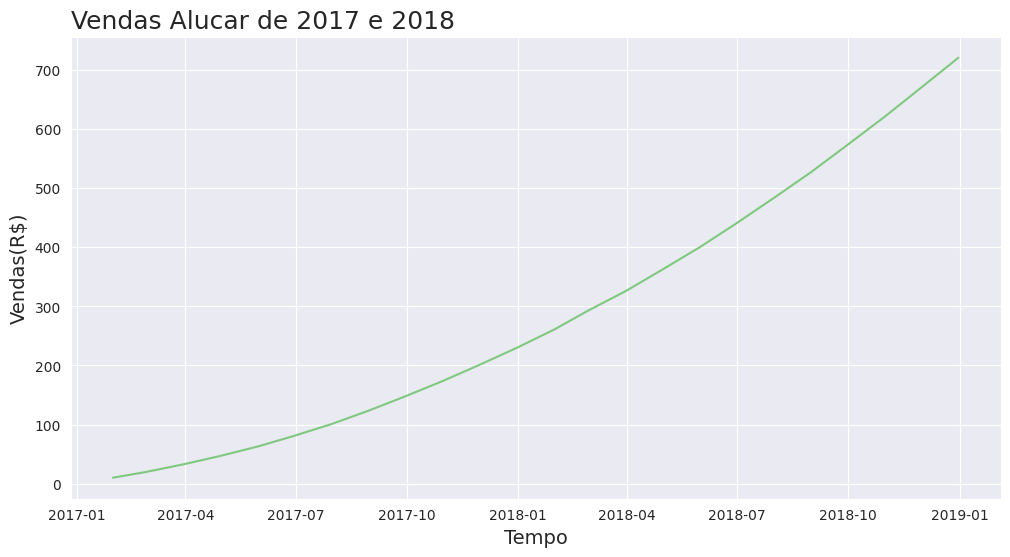

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes',y = 'vendas', data=alucar )
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left',fontsize=18)
ax.set_xlabel('Tempo',fontsize=14)
ax = ax.set_ylabel("Vendas(R$)",fontsize=14)

Aumento mes a mes

In [ ]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


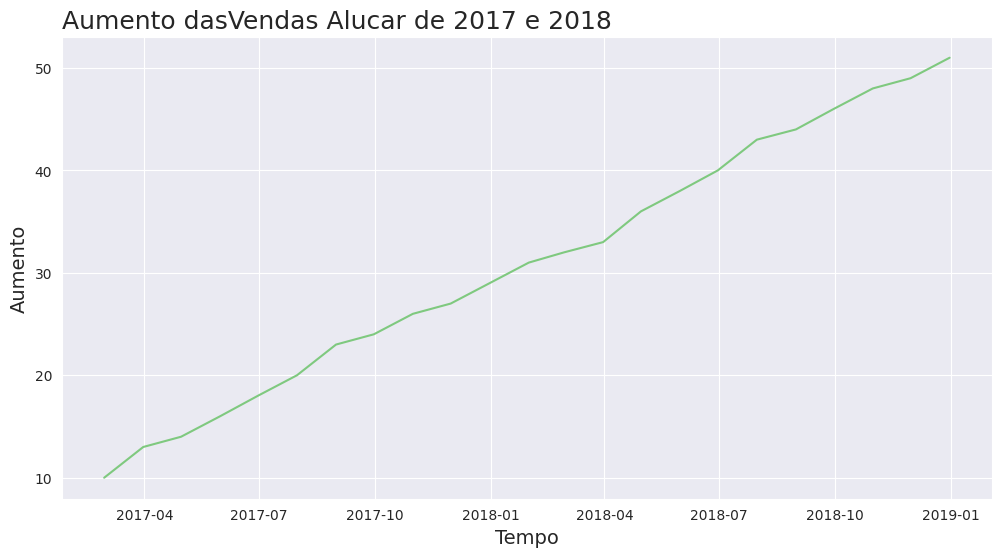

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes',y = 'aumento', data=alucar )
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento dasVendas Alucar de 2017 e 2018', loc='left',fontsize=18)
ax.set_xlabel('Tempo',fontsize=14)
ax = ax.set_ylabel("Aumento",fontsize=14)


chart function

In [ ]:
def plotar(titulo, labelx,labely, x ,y,dataset ):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x = x,y = y, data=alucar )
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='left',fontsize=18)
  ax.set_xlabel(labelx,fontsize=14)
  ax = ax.set_ylabel(labely,fontsize=14)

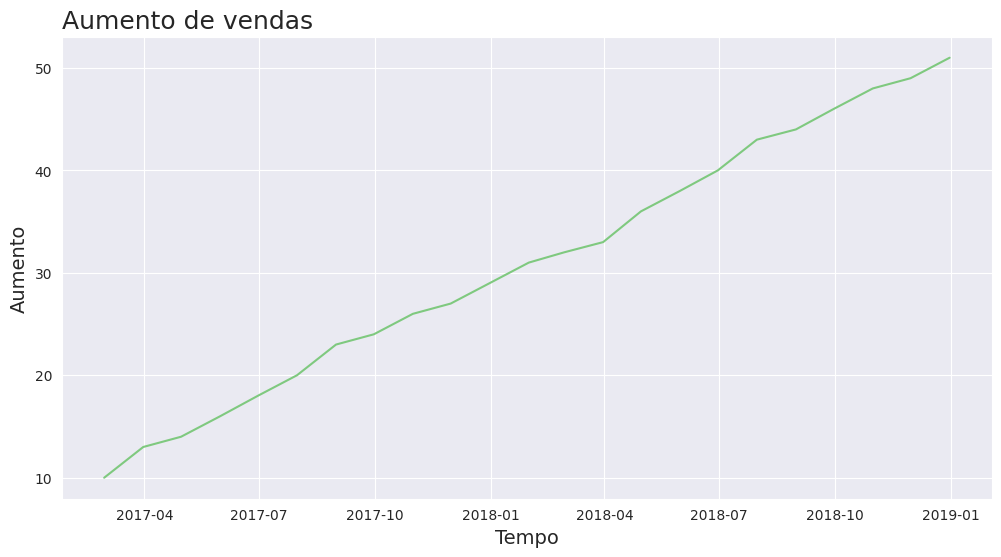

In [ ]:
plotar( 'Aumento de vendas' , 'Tempo','Aumento','mes', 'aumento', alucar )

In [ ]:
alucar['aceleraçao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleraçao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


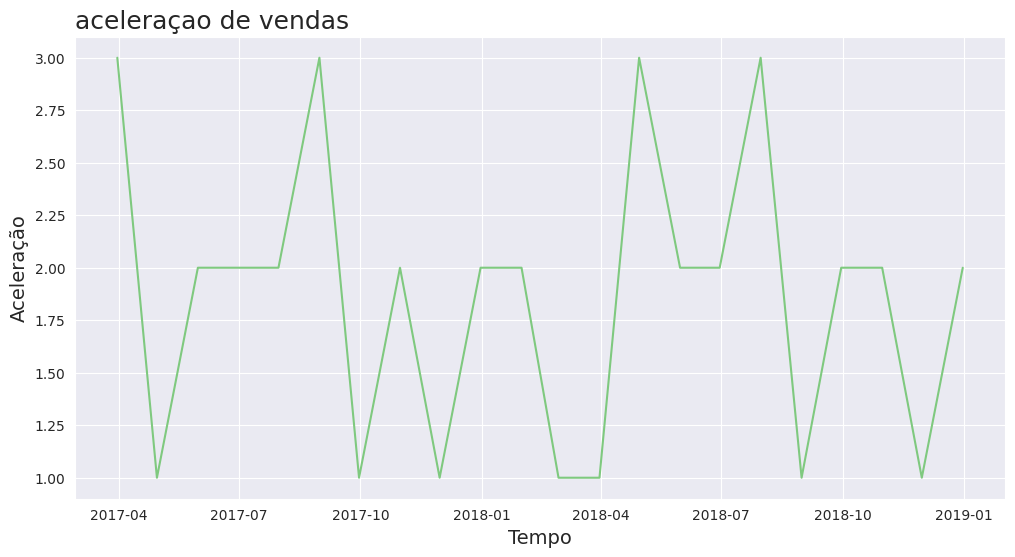

In [ ]:
plotar(  'aceleraçao de vendas', 'Tempo','Aceleração', 'mes','aceleraçao',alucar)

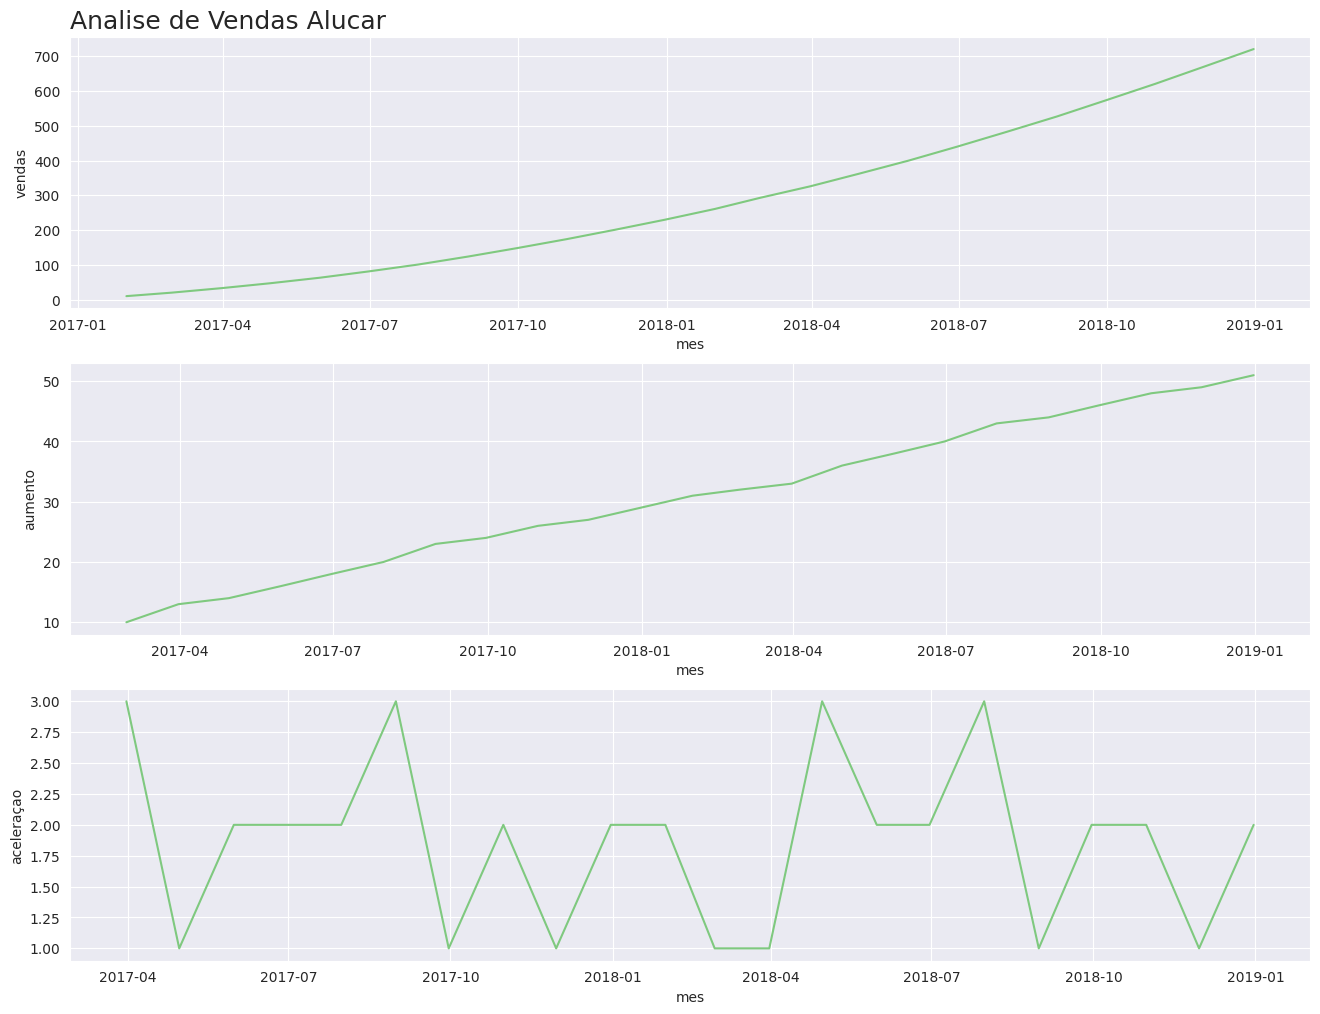

In [ ]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3 ,1, 1)
ax.set_title('Analise de Vendas Alucar ', fontsize=18, loc='left')
sns.lineplot(x='mes', y= 'vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y= 'aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y= 'aceleraçao', data=alucar)
ax = ax

In [ ]:
def plot_comparaçao(x,y,y2,y3,dataset,titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3 ,1, 1)
  ax.set_title('Analise de Vendas Alucar ', fontsize=18, loc='left')
  sns.lineplot(x= x, y= y , data=alucar)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y= y2, data=alucar)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y= y3, data=alucar)
  ax = ax


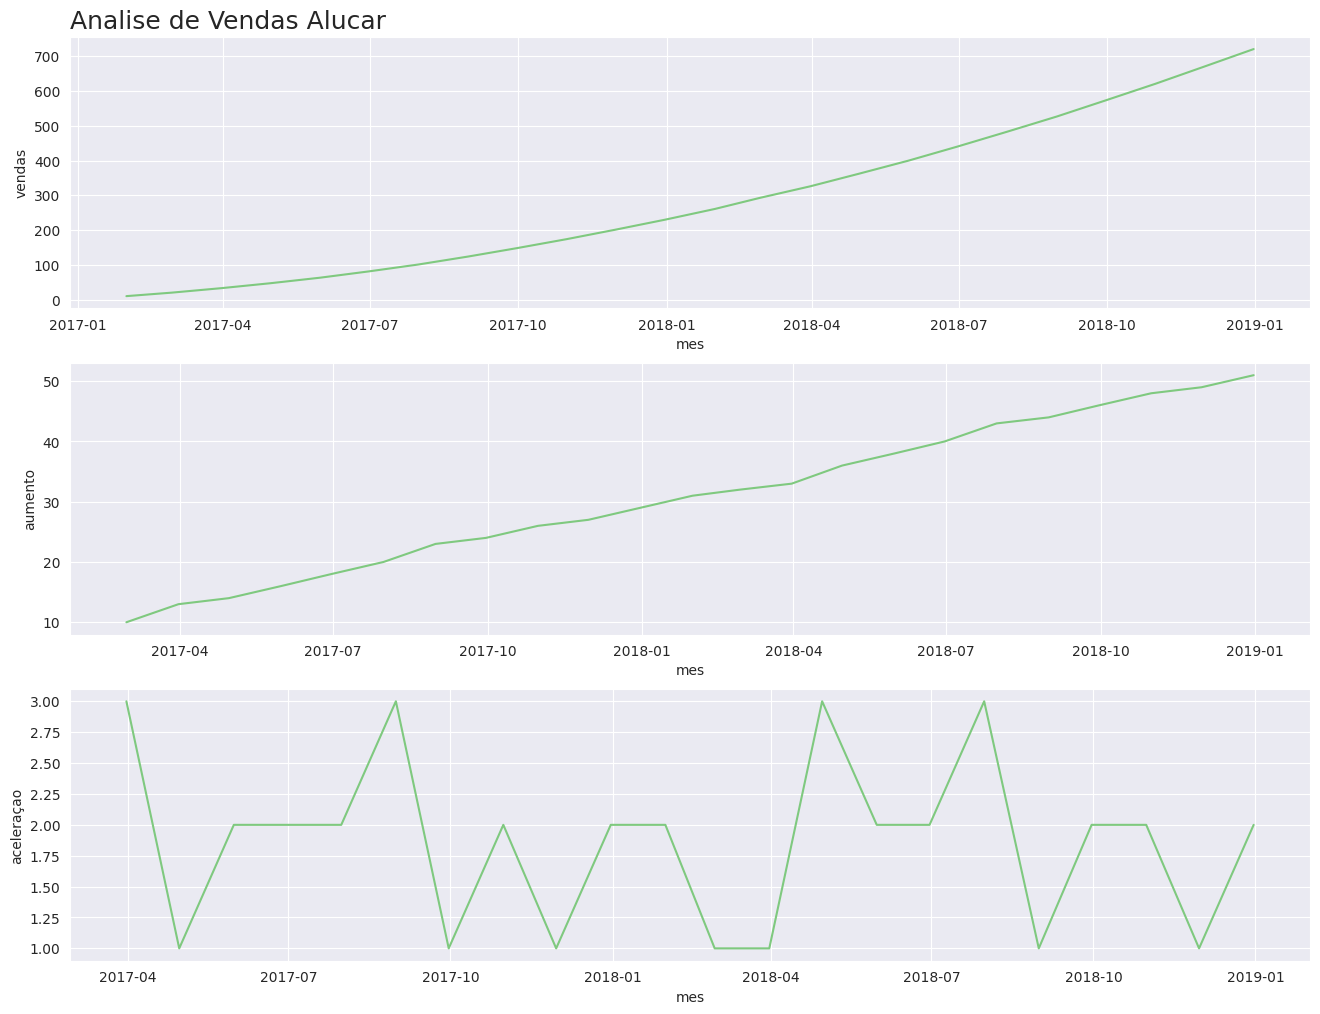

In [ ]:
plot_comparaçao(  'mes','vendas','aumento','aceleraçao',alucar,'analise de vendas')

## Nivel de correlação

In [ ]:
from pandas.plotting import autocorrelation_plot

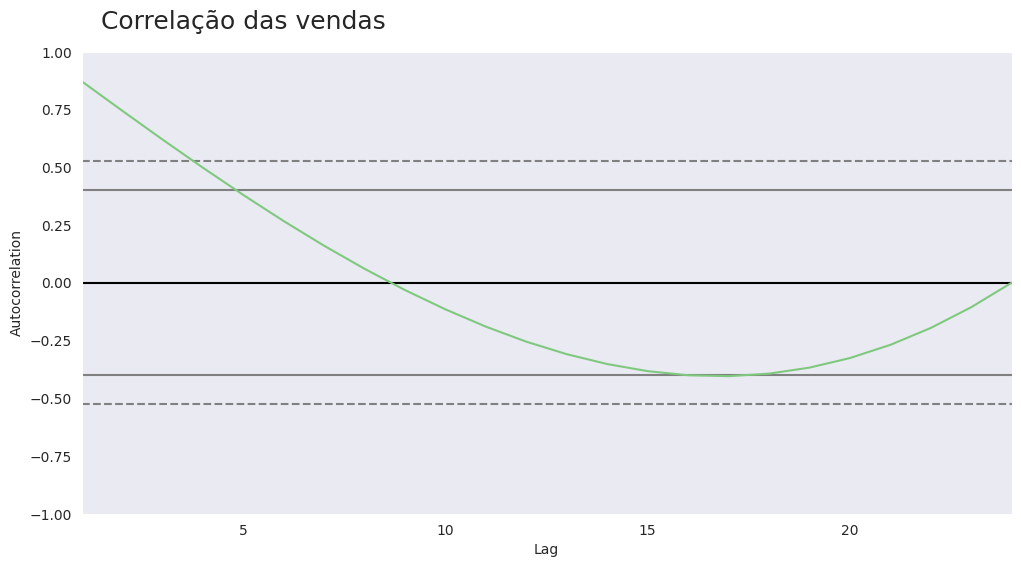

In [ ]:
ax =plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95 )
autocorrelation_plot(alucar['vendas'])
ax =ax

#correlação aceleração
a aceleração começa do valor um (indice 0 tem valor NAN )

In [ ]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento,aceleraçao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


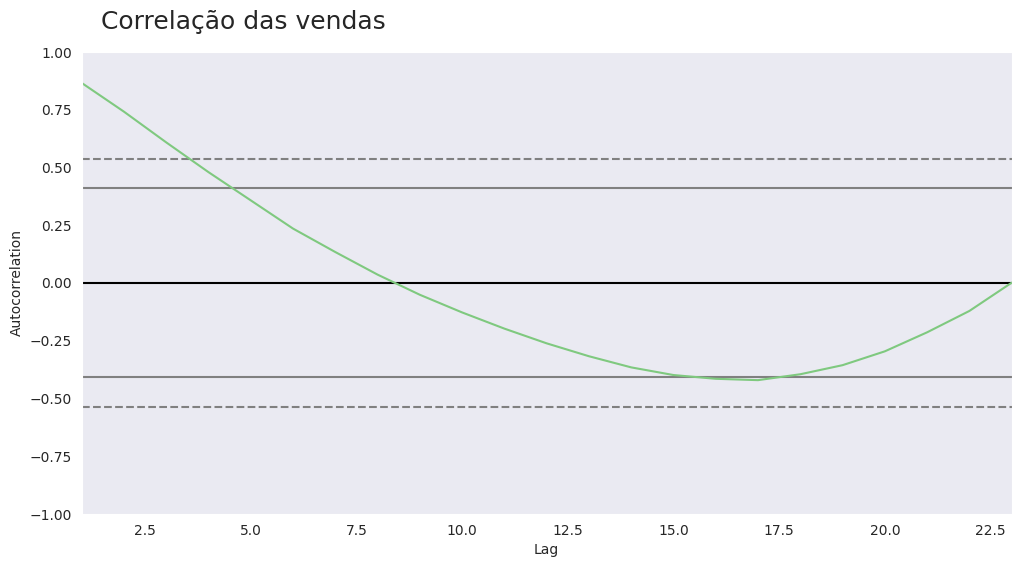

In [ ]:
ax =plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95 )
autocorrelation_plot(alucar['aumento'][1:])
ax =ax